# Neural Network test using Keras

In [1]:
%matplotlib inline
from os.path import join

import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

Using TensorFlow backend.


# Generate data

**Mean subtraction**: Input data already has zero-mean and no need to demean.

cf) http://cs231n.github.io/neural-networks-case-study/

In [2]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N * K,D)) # data matrix (each row = single example)
y = np.zeros(N * K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N * j, N * (j + 1))
  r = np.linspace(0.0, 1, N) # radius
  t = np.linspace(j * 4,(j + 1) * 4,N) + np.random.randn(N) * 0.2 # theta
  X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
  y[ix] = j

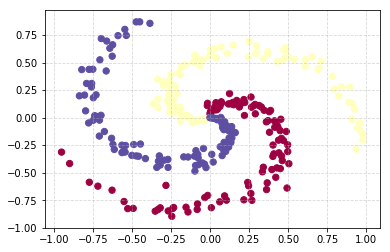

In [3]:
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral);

In [4]:
X[:5, :]

array([[ 0.        ,  0.        ],
       [-0.00032028,  0.01009593],
       [ 0.00273004,  0.02001671],
       [ 0.00356691,  0.03009237],
       [ 0.00100978,  0.04039142]])

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2], d

In [6]:
print(X.shape)
print(y.shape)

(300, 2)
(300,)


# Build model via Keras

**Initial weight**: Use default params. `kernel_initializer`='glorot_uniform', `bias_initializer`='zeros'  
**Regularisation**: No regularisation  
**y**: Vector y needs to be converted by *to_categorical()*

In [7]:
model = Sequential()
model.add(Dense(100, input_dim=2, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               300       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303       
Total params: 603
Trainable params: 603
Non-trainable params: 0
_________________________________________________________________


In [9]:
model_checkpoint = ModelCheckpoint(filepath=join('output', 'keras_test.{epoch:02d}.hdf5'), verbose=0)

In [ ]:
history = model.fit(X, to_categorical(y, 3), batch_size=10, epochs=100, verbose=1, callbacks=[model_checkpoint])

Epoch 1/100
300/300 [==============================] - 0s 1ms/step - loss: 1.0397 - acc: 0.4900
Epoch 2/100
300/300 [==============================] - 0s 497us/step - loss: 0.9700 - acc: 0.5500
Epoch 3/100
300/300 [==============================] - 0s 340us/step - loss: 0.9112 - acc: 0.5500
Epoch 4/100
180/300 [=================>............] - ETA: 0s - loss: 0.8829 - acc: 0.5222

# Result

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))
ax1.set_ylabel("Loss")
ax2.set_ylabel("Accuarcy")
ax1.set_xlabel("Epoch")
ax2.set_xlabel("Epoch")
ax1.plot(history.epoch, history.history["loss"])
ax2.plot(history.epoch, history.history["acc"]);

## Predict

In [ ]:
loaded_model = load_model(join('output', 'keras_test.100.hdf5'))

In [ ]:
def traverse(o, tree_types=(list, tuple)):
    if isinstance(o, tree_types):
        for value in o:
            for subvalue in traverse(value, tree_types):
                yield subvalue
    else:
        yield o

In [ ]:
n_linspace = 100
axis_grid = np.linspace(-1.5, 1.5, n_linspace)
grid_x, grid_y = np.meshgrid(axis_grid, axis_grid)
x_test = np.array([(i, j) for i, j in zip(traverse(grid_x.tolist()), traverse(grid_y.tolist()))])

Make predictions using the loaded model.

In [ ]:
y_hat = loaded_model.predict(x_test)
y_hat_grid = np.argmax(y_hat, axis=1).reshape((n_linspace, n_linspace))

In [ ]:
grid_x, grid_y = np.meshgrid(axis_grid, axis_grid)
fig, ax = plt.subplots()
ax.contourf(grid_x, grid_y, y_hat_grid, cmap=plt.cm.Spectral)
ax.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolors='black', cmap=plt.cm.Spectral);